<a href="https://colab.research.google.com/github/dungnguyen725/face_recog_cnn/blob/main/face_regconition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

In [4]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [5]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


In [6]:
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

In [8]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=200, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/200
1/1 - 9s - loss: 3.0058 - accuracy: 0.0395 - val_loss: 2.9905 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 2/200
1/1 - 7s - loss: 2.9984 - accuracy: 0.0307 - val_loss: 2.9911 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 3/200
1/1 - 7s - loss: 2.9959 - accuracy: 0.0702 - val_loss: 2.9882 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 4/200
1/1 - 7s - loss: 2.9815 - accuracy: 0.0614 - val_loss: 2.9870 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 5/200
1/1 - 7s - loss: 2.9850 - accuracy: 0.0482 - val_loss: 2.9878 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 6/200
1/1 - 7s - loss: 2.9877 - accuracy: 0.0482 - val_loss: 2.9868 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 7/200
1/1 - 7s - loss: 3.0064 - accuracy: 0.0439 - val_loss: 2.9872 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 8/200
1/1 - 7s - loss: 2.9795 - accuracy: 0.0789 - val_loss: 2.9898 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 9/200
1/1 - 7s - l

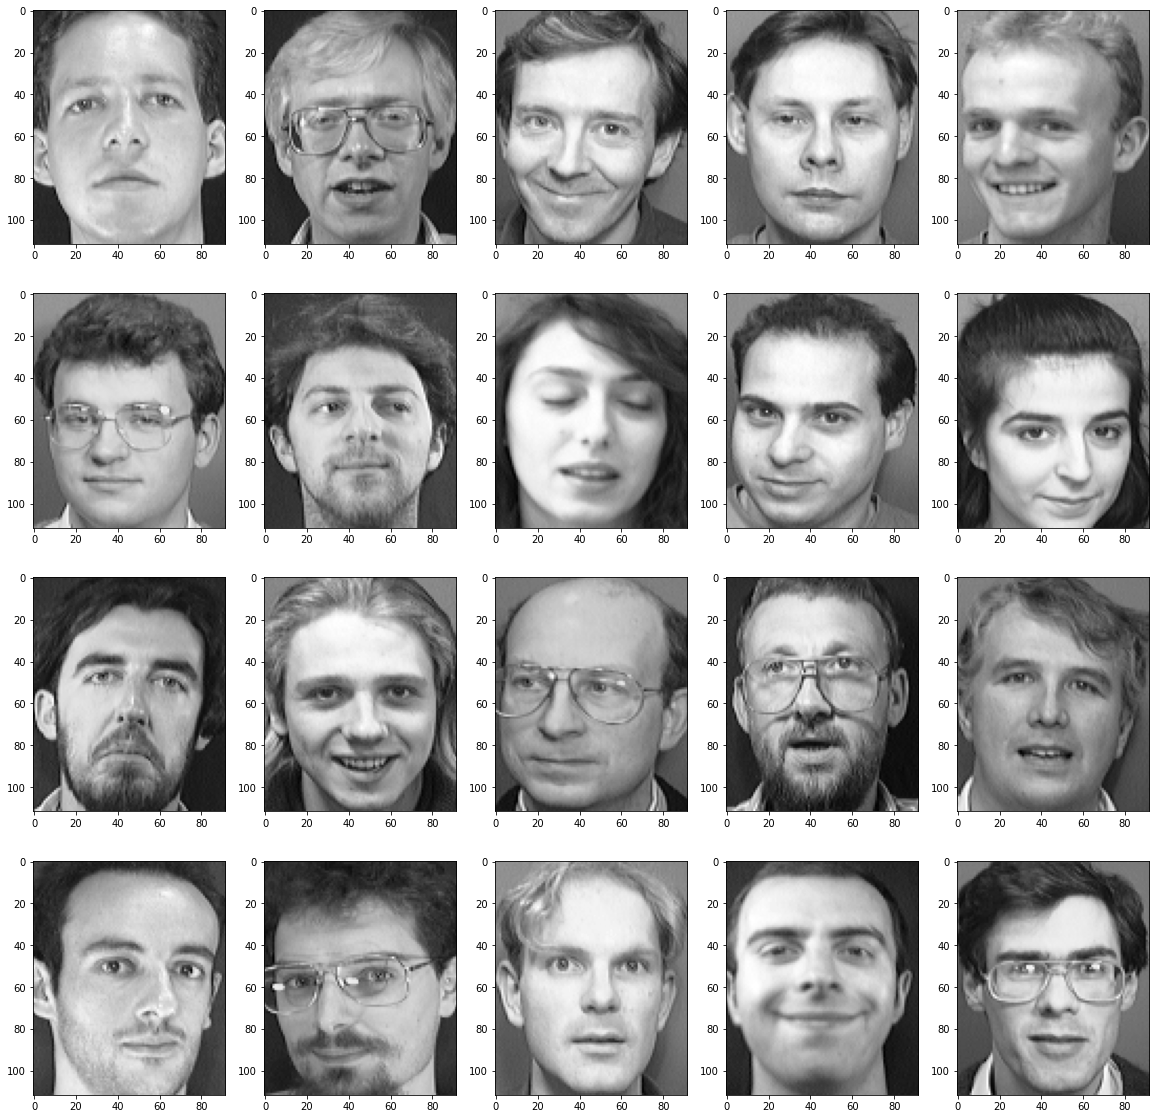

In [9]:
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
k=0
for i, ax in enumerate(axes.flat):
  ax.imshow(x_test[k].reshape(112, 92), cmap='gray')
  k = k+8


Ket qua du doan: Nguoi so 1


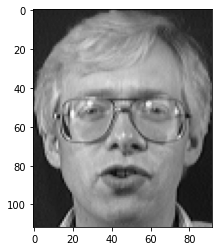

In [10]:
plt.imshow(x_test[9].reshape(112,92), cmap='gray')

y_predict = cnn_model.predict(x_test[9].reshape(1, 112, 92, 1))
print('Ket qua du doan: Nguoi so', np.argmax(y_predict))

In [11]:
y_pred = cnn_model.predict(x_test)
y_pred = np.round(y_pred).astype(int)

a = [0 for i in range(0,160)]
for i in range(0, 160):
  for j in range(0, 20):
    if y_pred[i][j] == 1:
      a[i] = j
predict_result = np.array(a, dtype='int')

acc = accuracy_score(y_test, predict_result)
print("accuracy :", acc)


accuracy : 0.9375


In [12]:
cnf_matrix=confusion_matrix(np.array(y_test), predict_result)

In [13]:
cnf_matrix

array([[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
print(classification_report(np.array(y_test), predict_result))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      0.75      0.86         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.67      1.00      0.80         8
           8       1.00      1.00      1.00         8
           9       1.00      0.75      0.86         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       0.89      1.00      0.94         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      0.50      0.67         8
          16       1.00      1.00      1.00         8
          17       0.80    